**Step 1: Make sure your environment is running :)**

In [1]:
#keep track of your environment!!!
#freeze if you finished your environment (!just once)
#!pip freeze > requirements.txt

# to install the environemt you can use this (!everytime you need a new setup)
#!pip install -r requirements.txt

In [2]:
#hiding the code
from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

**Step 2: Get your Data and prepare it**

In [3]:
from IPython import display
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox, Label, TwoByTwoLayout
import os

In [4]:
os.getcwd()

'/kaggle/working'

In [5]:
import pandas as pd

data = pd.read_csv('../input/escaperoom-wli/Ideen Wolf-Areal-Escape-Rooms.csv')
data.head()

,Participant,Alter,Geschlecht,Team,Gruppengrösse,Anzahl Rätstel,Geschwindigkeit,Kategorie
0,Lisa,26,w,1,3,10,01:20:17,m
1,Julia,12,w,1,3,10,01:20:17,m
2,Nadine,55,w,1,3,10,01:20:17,m
3,Lisa,26,m,6,3,10,01:45:17,m
4,Julia,12,m,6,3,10,01:45:17,m


In [6]:
data['Time'] = pd.to_datetime(data.Geschwindigkeit)
data.head()

,Participant,Alter,Geschlecht,Team,Gruppengrösse,Anzahl Rätstel,Geschwindigkeit,Kategorie,Time
0,Lisa,26,w,1,3,10,01:20:17,m,2020-12-14 01:20:17
1,Julia,12,w,1,3,10,01:20:17,m,2020-12-14 01:20:17
2,Nadine,55,w,1,3,10,01:20:17,m,2020-12-14 01:20:17
3,Lisa,26,m,6,3,10,01:45:17,m,2020-12-14 01:45:17
4,Julia,12,m,6,3,10,01:45:17,m,2020-12-14 01:45:17


In [7]:
# print(data['Geschlecht'])
# print(data.Geschlecht)

In [8]:
data = pd.get_dummies(data=data, columns=['Geschlecht', 'Kategorie'])
data.head()

,Participant,Alter,Team,Gruppengrösse,Anzahl Rätstel,Geschwindigkeit,Time,Geschlecht_d,Geschlecht_m,Geschlecht_w,Kategorie_b,Kategorie_m,Kategorie_s
0,Lisa,26,1,3,10,01:20:17,2020-12-14 01:20:17,0,0,1,0,1,0
1,Julia,12,1,3,10,01:20:17,2020-12-14 01:20:17,0,0,1,0,1,0
2,Nadine,55,1,3,10,01:20:17,2020-12-14 01:20:17,0,0,1,0,1,0
3,Lisa,26,6,3,10,01:45:17,2020-12-14 01:45:17,0,1,0,0,1,0
4,Julia,12,6,3,10,01:45:17,2020-12-14 01:45:17,0,1,0,0,1,0


In [9]:
#check for missing values
data.isnull().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0dc29d990>,
      dtype=object)

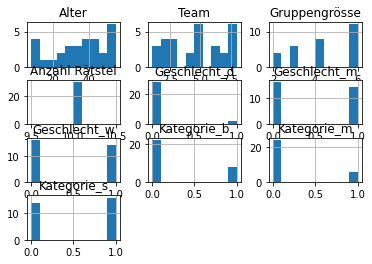

In [10]:
#check for outliers
data.hist()

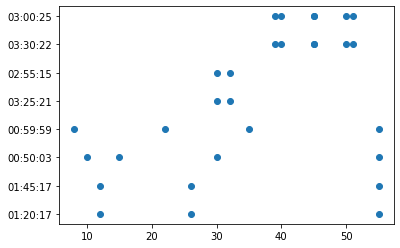

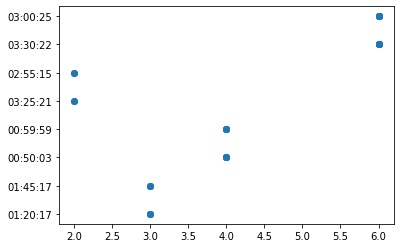

In [11]:
#check for linear relationship
import matplotlib.pyplot as plt
#plt.subplots(nrows=1, ncols=3)

# fig = plt.figure()
# fig.subplots_adjust(wspace=0,hspace=0)


plt.show(plt.scatter(data['Alter'], data['Geschwindigkeit']))
plt.show(plt.scatter(data['Gruppengrösse'], data['Geschwindigkeit']))

**Step 3: Train your mathmatical model**

In [12]:
# imports
import pandas as pd
import statsmodels.api as sm
import numpy as np

# defining feature matrix(X) and response vector(y) 

X = data.iloc[:, [1, 3, 9, 8, 11, 10]]
y = data['Time']

X = np.asarray(X)
y = np.asarray(y)

# print(X.shape)
# print(y.shape)

X = sm.add_constant(X) # adding a constant
# print(X.shape)

model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

#print(model.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     345.1
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           2.44e-21
Time:                        16:32:40   Log-Likelihood:                -844.15
No. Observations:                  30   AIC:                             1702.
Df Residuals:                      23   BIC:                             1712.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.608e+18   6.15e+11   2.61e+06      0.0

In [13]:
from sklearn import linear_model
#Participant	Alter	Team	Gruppengrösse	Anzahl Rätstel	Geschwindigkeit	Time	Geschlecht_d	Geschlecht_m	Geschlecht_w	Kategorie_b	Kategorie_m	Kategorie_s

reg = linear_model.LinearRegression()
reg.fit(data[['Alter', 'Gruppengrösse', 'Geschlecht_w', 'Geschlecht_m', 'Kategorie_m', 'Kategorie_b' ]], data['Time'])

print(reg.coef_)
print(reg.intercept_)
test = reg.predict(np.array([[25, 5, 0, 0, 1, 0]]))

geschw = '{0:02.0f}:{1:02.0f}'.format(*divmod(float(test) * 60, 60))
print(geschw)

[-7.78569199e+09  1.03624922e+11 -8.36093015e+11  4.98713028e+11
 -5.95462492e+12 -8.38394015e+12]
1.6079156207966016e+18
1607909989653989632:32


**Step 4: Evaluate your model**

In [14]:
# # fixing the trained parameters

# b0 = 1.6079156207966016e+18
# b1 = -7.78569199e+09
# b2 = 1.03624922e+11
# b3 = -8.36093015e+11
# b4 = 4.98713028e+11
# b5 = -5.95462492e+12
# b6 = -8.38394015e+12

# #!! something went wrong here
# print(b6)

In [15]:
# for this example we used the application "gretl" in order to train the model, but here are the trained parameters:


# Model 1: OLS, using observations 1-30
# Dependent variable: Geschwindigkeit

#                   coefficient   std. error   t-ratio     p-value 
#   ---------------------------------------------------------------
#   const            4.31185      0.693114       6.221    2.40e-06  ***
#   Alter            0.00412011   0.00837268     0.4921   0.6273   
#   GruppengrAsse    0.485580     0.0801809      6.056    3.55e-06  ***
#   female           0.310912     0.475766       0.6535   0.5199   
#   men             −0.132374     0.464225      −0.2852   0.7781   
#   middle          −4.48558      0.290538     −15.44     1.25e-013 ***
#   best            −2.93957      0.286221     −10.27     4.61e-010 ***

# Mean dependent var   4.966667   S.D. dependent var   2.456284
# Sum squared resid    6.149541   S.E. of regression   0.517080
# R-squared            0.964853   Adjusted R-squared   0.955684
# F(6, 23)             105.2326   P-value(F)           1.50e-15
# Log-likelihood      −18.79586   Akaike criterion     51.59171
# Schwarz criterion    61.40010   Hannan-Quinn         54.72950

# Excluding the constant, p-value was highest for variable 10 (men)




b0 = 4.31185
b1 = 0.00412011
b2 = 0.485580
b3 = 0.310912
b4 = -0.132374
b5 = -4.48558
b6 = -2.93957 


In [16]:
# Input via Jupyter Widgets e.g. new wine coordinates
# Output = Prediction of time needed for an escape room game

**Step 5: Visualize your prediction**

In [17]:
import ipywidgets as widgets

In [18]:
list_predict = []
list_teamname = []
list_teamsize = []

def predict_time(button):
    global b0, b1, b2, b3, b4, b5, b6
    
    x1 = float(age.value.strip())
    x2 = float(teamsize.value.strip())
    x3 = float(female.value.strip())
    x4 = float(male.value.strip())
    x5 = float(middle.value.strip())
    x6 = float(best.value.strip())
    
    y = b0  + b1 * x1 + b2 * x2 + b3 * x3 + b4 * x4 + b5 * x5 + b6 * x6 
    y = abs(y)
    
    geschw = '{0:02.0f}:{1:02.0f}'.format(*divmod(y * 60, 60))
    
    
    print(y, ' -> ', geschw)
    list_predict.append(geschw)
    list_teamname.append(team_name.value.strip())
    list_teamsize.append(teamsize.value.strip())

**Step 6: Get the value out of it**

In [19]:
age = widgets.Text(value='',
                    placeholder='age',
                    description='age:',
                    disabled=False)


teamsize = widgets.Text(value='',
                    placeholder='teamsize',
                    description='teamsize:',
                    disabled=False)

gender = widgets.Text(value='',
                    placeholder='1=female, 0=male, 0=divers',
                    description='gender:',
                    disabled=False)

female = widgets.Text(value='1',
                    placeholder='1=female, 0=male, 0=divers',
                    description='female?:',
                    disabled=False)

male = widgets.Text(value='0',
                    placeholder='0=female, 1=male, 0=divers',
                    description='male?:',
                    disabled=False)

category = widgets.Text(value='',
                    placeholder='best=0, middle=1, bad=2',
                    description='category:',
                    disabled=False)


middle = widgets.Text(value='1',
                    placeholder='0=best, 1=middle, 0=bad',
                    description='estimation:',
                    disabled=False)

best = widgets.Text(value='0',
                    placeholder='1=best, 0=middle, 0=bad',
                    description='estimation:',
                    disabled=False)

team_name = widgets.Text(value='',
                    placeholder='teamname',
                    description='team-name:',
                    disabled=False)


predict = widgets.Button(
    description='Create',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='search',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)


display.display(team_name, teamsize, age, gender, category, predict)
predict.on_click(predict_time)

Text(value='', description='team-name:', placeholder='teamname')

Text(value='', description='teamsize:', placeholder='teamsize')

Text(value='', description='age:', placeholder='age')

Text(value='', description='gender:', placeholder='1=female, 0=male, 0=divers')

Text(value='', description='category:', placeholder='best=0, middle=1, bad=2')

Button(button_style='warning', description='Create', icon='check', style=ButtonStyle(), tooltip='search')

In [20]:
print(list_predict)
print(list_teamname)
print(list_teamsize)

[]
[]
[]


In [21]:
import pandas as pd

#static example:
l1 = ['Heros', 'TopGun', 'Boosters', 'Lovelyguys']
l2 = [6, 5, 4, 6]
l3 = ['0:56', '0:59', '1:15', '0:41']

#or in a dynamic way:

# l1 = list_teamname
# l2 = list_teamsize
# l3 = list_predict



def create_bestlist():
    global l1, l2, l3, df
    
    #create pandas dataframe out of lists
    df = pd.DataFrame(list(zip(l1, l2, l3)), columns =['Teamname', 'Teamsize', 'Score'])
    
    #add additional column Rank in order to sort the results
    df['Rank'] = df['Score'].rank(axis=0, ascending=True)
    
    print(df)
    

In [22]:
create_bestlist()

     Teamname  Teamsize Score  Rank
0       Heros         6  0:56   2.0
1      TopGun         5  0:59   3.0
2    Boosters         4  1:15   4.0
3  Lovelyguys         6  0:41   1.0


In [23]:
colors = ['rgb(239, 243, 255)', 'rgb(189, 215, 231)', 'rgb(107, 174, 214)',
          'rgb(49, 130, 189)']

df['Colors'] = colors

df = df.sort_values(by=['Rank'])
print(df)

     Teamname  Teamsize Score  Rank              Colors
3  Lovelyguys         6  0:41   1.0   rgb(49, 130, 189)
0       Heros         6  0:56   2.0  rgb(239, 243, 255)
1      TopGun         5  0:59   3.0  rgb(189, 215, 231)
2    Boosters         4  1:15   4.0  rgb(107, 174, 214)


In [24]:
import plotly.graph_objects as go
from plotly.colors import n_colors

#import dash
#import dash_core_components as dcc


fig = go.Figure(data=[go.Table(
  header=dict(
    values=["<b>Teamname<b>", "<b>Teamsize</b>", "<b>Score</b>", "<b>Rank</b>"],
    line_color='white', fill_color='white',
    align='center', font=dict(color='black', size=12)
  ),
  cells=dict(
    values=[df.Teamname, df.Teamsize, df.Score, df.Rank],
    line_color=[df.Colors], fill_color=[df.Colors],
    align='center', font=dict(color='black', size=11)
  ))
])

fig.show()

# app = dash.Dash()
# app.layout = html.Div([
#     dcc.Graph(figure=fig)
# ])